## POSTTEST 5

## Nama : Novitasari Malisan

## NIM : 2109106133

# IMPORT LIBRARY

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv('AirlinePassengerSatisfaction.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

Mengecek apakah terdapat nilai nulll di dalam data

In [5]:
# Mengecek apakah terdapat nilai null di dalam data
df = pd.read_csv("AirlinePassengerSatisfaction.csv")

df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


Karena terdapat nilai null pada kolom 'Arrival Delay in Minutes', maka kita perlu untuk membersihkannya

In [6]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(strategy="mean")

df['Arrival Delay in Minutes'] = imputer_mean.fit_transform(df[['Arrival Delay in Minutes']])

df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Melakukan Encoding pada dataset dengan setiap kolom yang ada pada data

## SUPRVISED LEARNING

Pisahkan fitur (X) dan label (y)

In [8]:
X = df[['Seat comfort', 'Inflight entertainment']] 
y = df['satisfaction'] 

Bagi dataset menjadi data pelatihan dan data pengujian

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Inisialisasi model SVC

In [10]:
svc = SVC()

Latih model SVC pada data pelatihan

In [11]:
svc.fit(X_train, y_train)

SVC()

Lakukan prediksi dengan SVC pada data pengujian

In [12]:
y_pred_svc = svc.predict(X_test)

Hitung confusion matrix dengan SVC

In [13]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

Hitung classification report dengan SVC

In [14]:
class_report_svc = classification_report(y_test, y_pred_svc)

Tampilkan hasil evaluasi dengan SVC

## Confusion Matrix)

In [15]:
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

Visualisasi Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (SVC)')

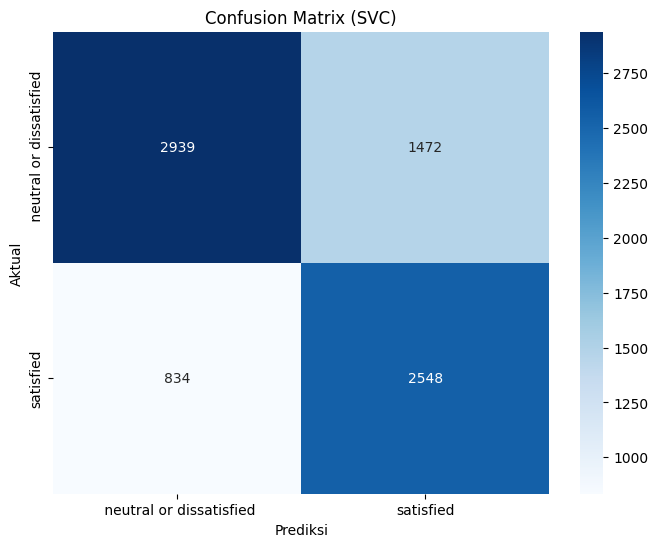

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=[' neutral or dissatisfied', 'satisfied'], yticklabels=[' neutral or dissatisfied', 'satisfied'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (SVC)')

Classification Report

Visualisasi Cllassifiction Report

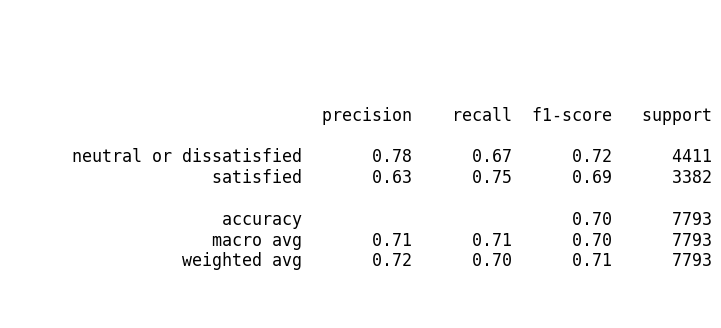

In [17]:
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_svc, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

Plot Hasil Prediksi dan Target Asli dengan SVC

In [18]:
color_map = {'neutral or dissatisfied': 'r', 'satisfied': 'g'}
y_pred_colors = [color_map[label] for label in y_pred_svc]
y_test_colors = [color_map[label] for label in y_test]

Visualisasi Data

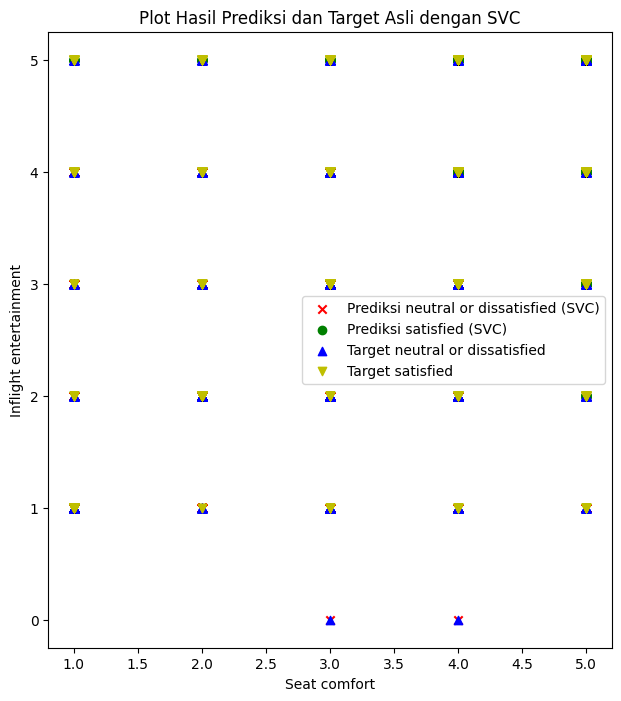

In [19]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

# Titik-titik hasil prediksi SVC dengan warna berbeda (hijau untuk benar, merah untuk salah)
# Prediksi neutral or dissatisfied (SVC)
plt.scatter(X_test[y_pred_svc == 'neutral or dissatisfied']['Seat comfort'], X_test[y_pred_svc == 'neutral or dissatisfied']['Inflight entertainment'], c='r', marker='x', label='Prediksi neutral or dissatisfied (SVC)')

# Prediksi satisfied (SVC)
plt.scatter(X_test[y_pred_svc == 'satisfied']['Seat comfort'], X_test[y_pred_svc == 'satisfied']['Inflight entertainment'], c='g', marker='o', label='Prediksi satisfied (SVC)')

plt.scatter(X_test[y_test == 'neutral or dissatisfied']['Seat comfort'], X_test[y_test == 'neutral or dissatisfied']['Inflight entertainment'], c='b', marker='^', label='Target neutral or dissatisfied')

# Target satisfied
plt.scatter(X_test[y_test == 'satisfied']['Seat comfort'], X_test[y_test == 'satisfied']['Inflight entertainment'], c='y', marker='v', label='Target satisfied')

plt.xlabel('Seat comfort')
plt.ylabel('Inflight entertainment')
plt.title('Plot Hasil Prediksi dan Target Asli dengan SVC')
plt.legend(loc='best')
plt.show()


## Implementasi Metode K-Nearest Neighbors (KNN)

In [20]:
#inisialisasi model KNN
knn = KNeighborsClassifier(n_neighbors=3)

In [21]:
# Latih Model KNN pada data pelatihan
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

Lakukan prediksi dengan KNN pada data Pengujian

In [22]:
y_pred_knn = knn.predict(X_test)

Hitung confusion matrix dengan KNN

In [23]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

In [24]:
#Hitung classification report dengan KNN
class_report_knn = classification_report(y_test, y_pred_knn)

Tampilkan hasil evaluasi dengan KNN

In [25]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

Text(0.5, 1.0, 'Confusion Matrix (KNN)')

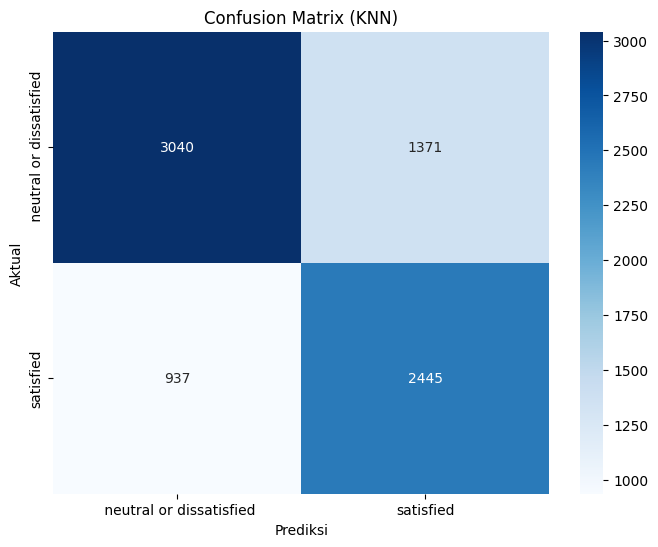

In [26]:
#visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=[' neutral or dissatisfied', 'satisfied'], yticklabels=[' neutral or dissatisfied', 'satisfied'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix (KNN)')

In [27]:
#Classification Report
class_report_knn = classification_report(y_test, y_pred_knn)

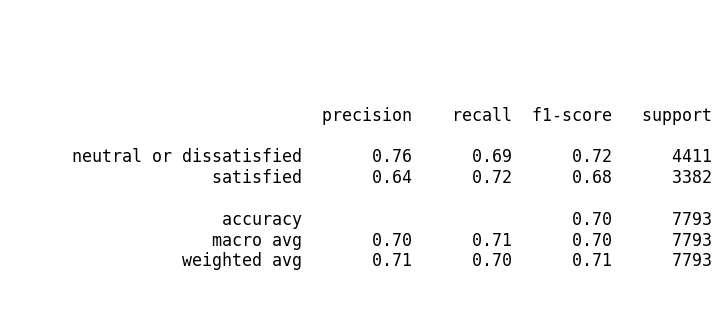

In [28]:
#visualisasi Classification Report
plt.figure(figsize=(8, 4))
plt.text(0.1, 0.1, class_report_knn, {'fontsize': 12}, fontproperties='monospace')
plt.axis('off')

plt.show()

## LINEAR REGRESSION

In [29]:
X, y = df[['Seat comfort']], df['Inflight entertainment']

In [30]:
#membagi data fitur dan target menjadi data training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

Membuat model regresi linear, melatih model dengan data training dan menggunakan model untuk membuat prediksi pada data test

In [31]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

Visualisasi hasil prediksi regresi linear pada data test yang membandingkan prediksi (garis biru) dengan data asli (titik hitam) untuk melihat sejauh mana model cocok dengan data aktual

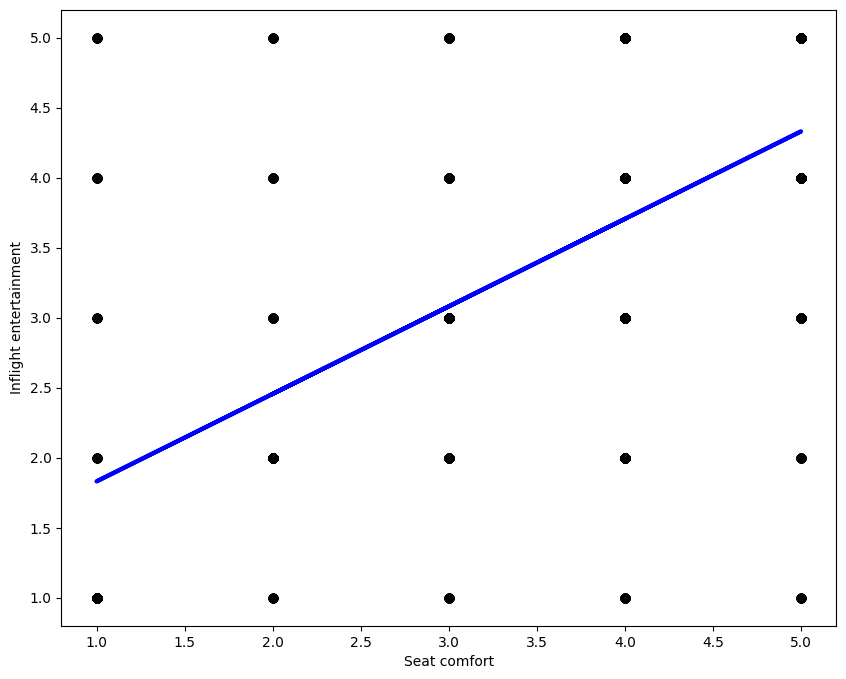

In [32]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("Seat comfort")
plt.ylabel("Inflight entertainment")
plt.show()

Membuat objek classifier SVM

In [33]:
svm = SVC(kernel="linear")

In [34]:
#melatih classifier dengan data train
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
#Melakukan prediksi data test dengan model dan menampilkan hasil
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 0.8754811393379522
MSE : 1.8050423402617397
RMSE : 1.3435186415758211
R-Squared : -0.013831870612398989


## UNSUPERVISED LEARNING

 ### K-Means

Menggunakan kolom Seat comfort (kolom ke-0) dan Inflight entertainment (kolom ke-4)

In [36]:
X = df.iloc[:, [0, 4]].values 

Inisialisasi list untuk menyimpan nilai WCSS tiap kelompok

In [37]:
wcss = [] 

Buat loop untuk melatih algoritma K-Means dengan berbagai jumlah kluster (K)

In [38]:
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

Buat grafik Elbow Method

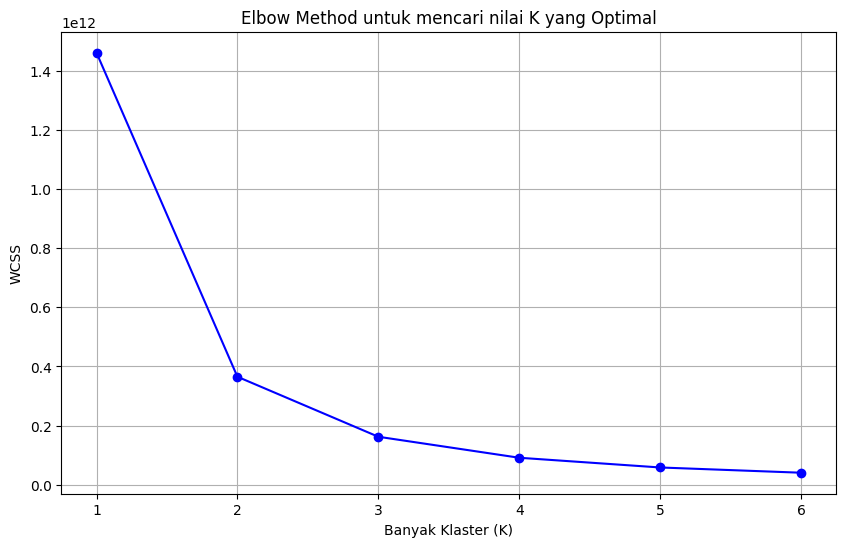

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Inisialisasi model K-Means dengan nilai K yang sesuai

In [40]:
k = 3 
kmeans = KMeans(k, n_init=10)

Pilih hanya kolom "Seat comfort" dan "Inflight entertainment" sebagai fitur X

In [41]:
X = df[["Seat comfort", "Inflight entertainment"]]

Fit model K-Means pada dataset

In [42]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10)

Membuat label kelompok dari model dan tambah kolom prediksi serta titik pusat kelompok dari model

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_ca

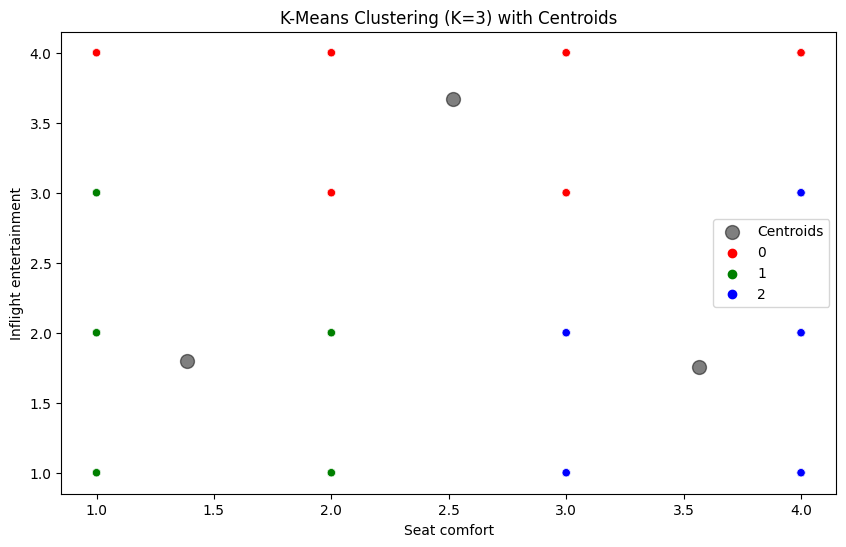

In [43]:
# Generate random data for Seat comfort and Inflight entertainment for 2000 data points
data = {
    'Seat comfort': np.random.randint(1, 5, 2000),
    'Inflight entertainment': np.random.randint(1, 5, 2000)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Define the number of clusters (K)
K = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=K)
kmeans.fit(df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add the cluster column to the DataFrame
df['cluster'] = cluster_labels

# Get cluster centers
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
plt.figure(figsize=(10, 6))
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="Seat comfort", y="Inflight entertainment", hue="cluster", palette=["red", "green", "blue"])
plt.title(f"K-Means Clustering (K={K}) with Centroids")
plt.xlabel("Seat comfort")
plt.ylabel("Inflight entertainment")
plt.legend()
plt.show()



Membuat crosstab untuk membandingkan cluster labels dengan true labels

In [ ]:
cross_tab = pd.crosstab(df["cluster"], df["satisfaction"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

### Adjusted Rand Index (ARI)

In [ ]:
ari = adjusted_rand_score(df["satisfaction"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

### Normalized Mutual Information (NMI)

In [ ]:
true_labels_num = df["satisfaction"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Homogeneity, Completeness dan V-Measure membantu mengukur sejauh mana hasil klustering sesuai dengan label asli data dan seberapa baik klustering tersebut dalam mengelompokkan data

In [ ]:
homogeneity = homogeneity_score(df["satisfaction"], cluster_labels)
completeness = completeness_score(df["satisfaction"], cluster_labels)
v_measure = v_measure_score(df["satisfaction"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")